In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
url = "datas10.txt"
names = ['Day', 'Month', 'Year', 'Hour', 'Minute', 'Incoming', 'Outgoing', 'Person Count']
dataset = pd.read_csv(url, names=names)

X = dataset.iloc[:, :-3].values
y = dataset.iloc[:, 7].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

mre = 0
for i in np.arange(len(y_test)):
    if y_test[i] == 0: 
        continue
    else:
        mre += np.abs(y_test[i]-y_pred[i])/y_test[i]*100
mre = mre/len(y_test)
print(mre)

rmse = 0
for i in np.arange(len(y_test)):
    rmse += (y_test[i]-y_pred[i])^2
rmse *= len(y_test)
rmse = np.sqrt(rmse)/len(y_test)
print(rmse)

36.05164447892495
3.4406551176903633


In [3]:
future_date = [[1,1,2021,9,0],
               [1,1,2021,10,0],
               [1,1,2021,11,0],
               [1,1,2021,12,0],
               [1,1,2021,13,0],
               [1,1,2021,14,0],
               [1,1,2021,15,0],
               [1,1,2021,16,0],
               [1,1,2021,17,0]]
future_date = scaler.transform(future_date)

future_date2 = [[1,1,2021,11,0],
               [2,1,2021,11,0],
               [3,1,2021,11,0],
               [4,1,2021,11,0],
               [5,1,2021,11,0],
               [6,1,2021,11,0],
               [7,1,2021,11,0],
               [8,1,2021,11,0],
               [9,1,2021,11,0]]
future_date2 = scaler.transform(future_date2)

future_date3 = [[1,1,2021,11,0],
               [1,2,2021,11,0],
               [1,3,2021,11,0],
               [1,4,2021,11,0],
               [1,5,2021,11,0],
               [1,6,2021,11,0],
               [1,7,2021,11,0],
               [1,8,2021,11,0],
               [1,9,2021,11,0]]
future_date3 = scaler.transform(future_date3)

future_pred = classifier.predict(future_date)
result = np.hstack((np.floor(scaler.inverse_transform(future_date)),future_pred.reshape(9,1)))
df = pd.DataFrame(result,columns=['Day', 'Month','Year','Hour','Minute','Person Count'])
print(df)

future_pred2 = classifier.predict(future_date2)
result = np.hstack((np.floor(scaler.inverse_transform(future_date2)),future_pred2.reshape(9,1)))
df = pd.DataFrame(result,columns=['Day', 'Month','Year','Hour','Minute','Person Count'])
print(df)

future_pred3 = classifier.predict(future_date3)
result = np.hstack((np.floor(scaler.inverse_transform(future_date3)),future_pred3.reshape(9,1)))
df = pd.DataFrame(result,columns=['Day', 'Month','Year','Hour','Minute','Person Count'])
print(df)

   Day  Month    Year  Hour  Minute  Person Count
0  1.0    1.0  2021.0   9.0     0.0           0.0
1  1.0    1.0  2021.0  10.0     0.0           0.0
2  1.0    1.0  2021.0  11.0     0.0           0.0
3  1.0    1.0  2021.0  12.0     0.0           0.0
4  1.0    1.0  2021.0  13.0     0.0           1.0
5  1.0    1.0  2021.0  14.0     0.0          16.0
6  1.0    1.0  2021.0  15.0     0.0          15.0
7  1.0    1.0  2021.0  16.0     0.0          15.0
8  1.0    1.0  2021.0  17.0     0.0           6.0
   Day  Month    Year  Hour  Minute  Person Count
0  1.0    1.0  2021.0  11.0     0.0           0.0
1  2.0    1.0  2021.0  11.0     0.0          22.0
2  3.0    1.0  2021.0  11.0     0.0          22.0
3  4.0    1.0  2021.0  11.0     0.0           8.0
4  5.0    1.0  2021.0  11.0     0.0           0.0
5  6.0    1.0  2021.0  11.0     0.0           0.0
6  7.0    1.0  2021.0  11.0     0.0           0.0
7  8.0    1.0  2021.0  11.0     0.0          23.0
8  9.0    1.0  2021.0  11.0     0.0          24.0


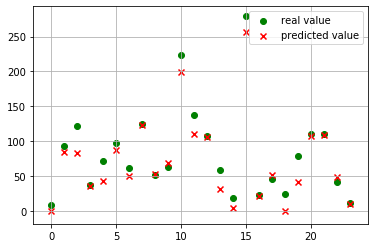

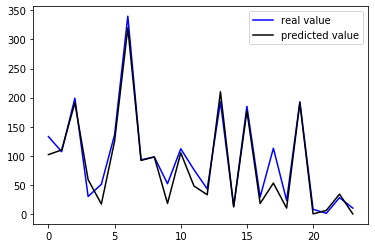

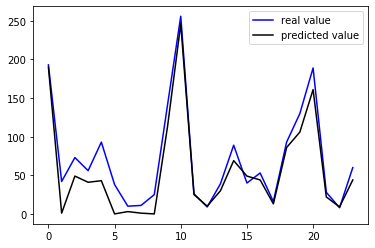

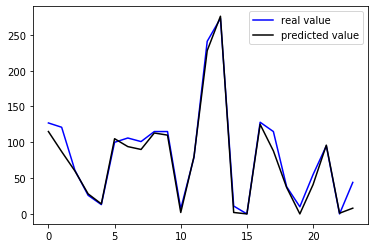

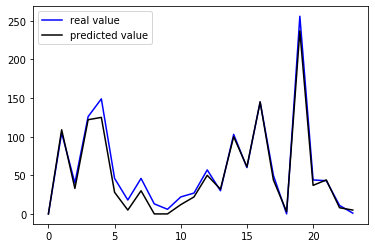

In [4]:
import matplotlib.pyplot as plt


n_y_test = np.array_split(y_test, 300)
n_y_pred = np.array_split(y_pred, 300)

t = np.arange(0, len(n_y_test[0]))
x_axis = list(range(len(n_y_test[0])))
plt.figure()
plt.scatter(x_axis, n_y_test[0], marker='o', color='g')
plt.scatter(x_axis, n_y_pred[0], marker='x', color='r')
plt.legend(['real value', 'predicted value'])
plt.grid()
plt.show()
plt.figure()
plt.plot(t, n_y_test[1], 'b', t, n_y_pred[1], 'k')
plt.legend(['real value', 'predicted value'])
plt.show()
plt.figure()
plt.plot(t, n_y_test[2], 'b', t, n_y_pred[2], 'k')
plt.legend(['real value', 'predicted value'])
plt.show()
plt.figure()
plt.plot(t, n_y_test[3], 'b', t, n_y_pred[3], 'k')
plt.legend(['real value', 'predicted value'])
plt.show()
plt.figure()
plt.plot(t, n_y_test[4], 'b', t, n_y_pred[4], 'k')
plt.legend(['real value', 'predicted value'])
plt.show()

In [130]:
# the update function
def update(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters.'''
    # Calculate the new parameters
    new_mean = (var2*mean1 + var1*mean2)/(var2+var1)
    new_var = 1/(1/var2 + 1/var1)
    
    return [new_mean, new_var]


# the motion update/predict function
def predict(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters, after motion.'''
    # Calculate the new parameters
    new_mean = mean1 + mean2
    new_var = var1 + var2
    
    return [new_mean, new_var]

In [132]:
update(20,3,22,3)

[21.0, 1.5]

In [134]:
predict(21,1.5,20,1.5)

[41, 3.0]

In [25]:
from filterpy.kalman import KalmanFilter
kf = KalmanFilter(dim_x=3, dim_z=1)
f.F = np.array([[1.,1.],
                [0.,1.]])
f.H = np.array([[1.,0.]])
f.P = np.array([[1000.,    0.],
                [   0., 1000.] ])
print(kf)

KalmanFilter object
dim_x = 3
dim_z = 1
dim_u = 0
x = [[0. 0. 0.]].T
P = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]
x_prior = [[0. 0. 0.]].T
P_prior = [[1. 0. 0.]
           [0. 1. 0.]
           [0. 0. 1.]]
x_post = [[0. 0. 0.]].T
P_post = [[1. 0. 0.]
          [0. 1. 0.]
          [0. 0. 1.]]
F = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]
Q = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]
R = [[1.]]
H = [[0. 0. 0.]]
K = [[0. 0. 0.]].T
y = [[0.]]
S = [[0.]]
SI = [[0.]]
M = [[0.]]
B = None
z = [[None]]
log-likelihood = -708.3964185322641
likelihood = 2.2250738585072014e-308
mahalanobis = 0.0
alpha = 1.0
inv = <function inv at 0x000002837C296EE8>
